<a href="https://colab.research.google.com/github/braingeneers/experiment/blob/master/ingest/view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# View Batch of Experiments
Load and plot a batch of experiments to demonstrate the structure of the Braingeneers data archive.

Multiple experiments are generated in the lab, one per folder with any .txt files in the folder considered to be notes. The batch is assigned a UUID and then ingested (see [ingest.ipynb](https://github.com/braingeneers/experiment/blob/master/ingest/ingest.ipynb)) and uploaded to PRP S3 with the following structure:

metadata.json: Timestamp, Github Issue URL and list of individual experiment metadata.json files

Each experiment consists of a metadata.json with all the information from the original instrument file recordings as well as one or more .npy files.

In [0]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Base URL to the entire Braingeneers archive on S3/PRP
archive_url = "https://s3.nautilus.optiputer.net/braingeneers/archive"

def load_experiment(path):
    """ 
    Load signal and metadata stored in S3 via the ingest notebook. 
    Returns:
    X = signal vector of microvolt time series readings, one for each of the channels
    t = time in milliseconds for each reading (for conveniance, all samples at fs)
    fs = sample rate
    metadata = all of the metadata associated with this experiment
    """

    # Each experiment has a metadata file with all *.rhd headers and other sample info
    metadata = requests.get("{}/{}".format(archive_url, path)).json()

    # Load all the numpy files into a single matrix
    X = np.concatenate([
        np.load(np.DataSource(None).open("{}/{}".format(archive_url, s["derived"]), "rb"))
        for s in metadata["samples"]], axis=1)

    # Convert from the raw uint16 into float "units" via "offset" and "scaler"
    X = np.multiply(metadata["samples"][0]["scaler"], (X.astype(np.float32) - metadata["samples"][0]["offset"]))
    
    # Extract sample rate for first channel and construct a time axis in seconds
    fs = metadata["samples"][0]["frequency_parameters"]["amplifier_sample_rate"]
    t = np.linspace(0, 1000 * X.shape[1] / fs, X.shape[1])
    
    return X, t, fs, metadata

email: Sergio Cordero <sacorder@ucsc.edu>
experiments: ['derived/2019-01-25-v1/Record1Noise.json', 'derived/2019-01-25-v1/Record2Noise.json', 'derived/2019-01-25-v1/Record3Noise.json', 'derived/2019-01-25-v1/Record4Noise.json', 'derived/2019-01-25-v1/Record5Noise.json', 'derived/2019-01-25-v1/Record6Noise.json']
issue: https://github.com/braingeneers/internal/issues/10
notes: MEA recordings at UCSC of wells with solution in them to determine whether various Faraday cage configurations.

timestamp: 2019-01-25T10:43:56
uuid: 2019-01-25-v1


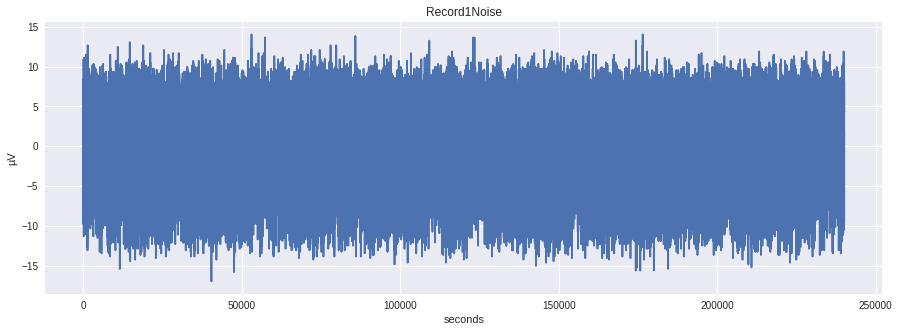

-MEASUREMENT LOCATIONS: MEA placed within faraday cage. MEA is shielded using foil completely enclosing the device. Intan board is left outside of the cage

-GROUNDING: The PCB connecting to the MEA ground wire is connected to the foil and the foil is grounded to the cage door frame

-FARADAY CAGE CONFIGURATION: Cage door is open and table is off

-CONNECTED WELL: Well B 

-BAD CHANNELS: 19,11,20,23

-SOLUTION: 150 micro-liters of Sasai4

-SAMPLING RATE: 30kS/s

-RECODRING TIME: ~5MIN

-HUMAN INTERFERANCE: when leaving and returning heavy amounts of noise occured and therefore the files were removed. The files for this expereiment are only the MEA in an empty room. This is only recording where files were removed. 



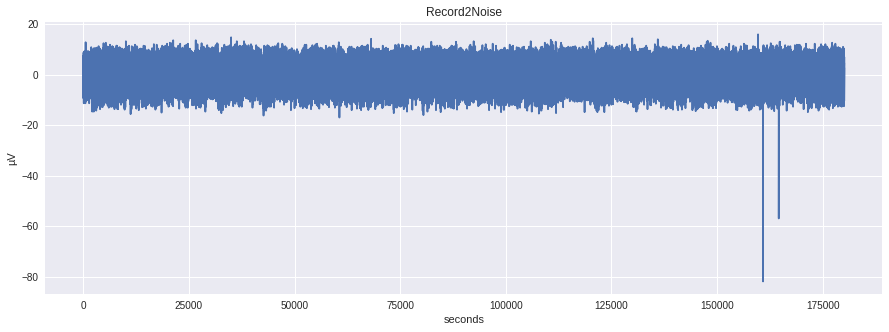

-MEASUREMENT LOCATIONS: MEA placed within faraday cage. MEA is shielded using foil completely enclosing the device. Intan board is left outside of the cage

-GROUNDING: The PCB connecting to the MEA ground wire is connected to the foil and the foil is grounded to the cage door frame

-FARADAY CAGE CONFIGURATION: Cage door is open and table is off

-CONNECTED WELL: Well B 

-BAD CHANNELS: 19,11,20,23

-SOLUTION: 150 micro-liters of Sasai4

-SAMPLING RATE: 30kS/s

-RECODRING TIME: ~5MIN

-HUMAN INTERFERANCE: when leaving and returning heavy amounts of noise occured and therefore the files were removed. The files for this expereiment are only the MEA in an empty room. This is only recording where files were removed. 



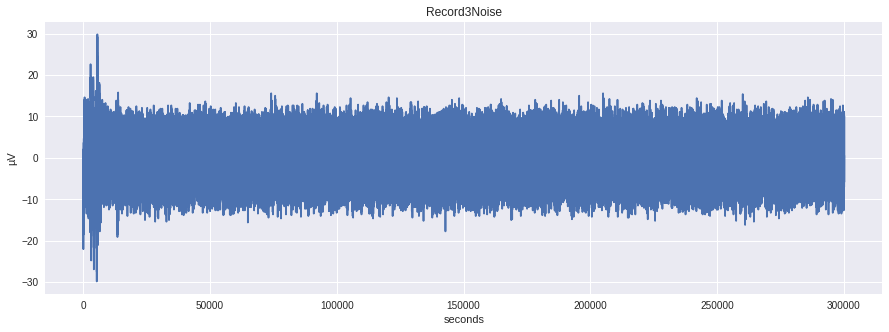

-MEASUREMENT LOCATIONS: MEA placed within faraday cage. MEA is shielded using foil completely enclosing the device. Intan board is left outside of the cage

-GROUNDING: The PCB connecting to the MEA ground wire is connected to the foil and the foil is grounded to the cage door frame

-FARADAY CAGE CONFIGURATION: Cage door is open and table is off

-CONNECTED WELL: Well B 

-BAD CHANNELS: 19,11,20,23

-SOLUTION: 150 micro-liters of Sasai4

-SAMPLING RATE: 30kS/s

-RECODRING TIME: ~5MIN

-HUMAN INTERFERANCE: when leaving and returning heavy amounts of noise occured and therefore the files were removed. The files for this expereiment are only the MEA in an empty room. This is only recording where files were removed. 



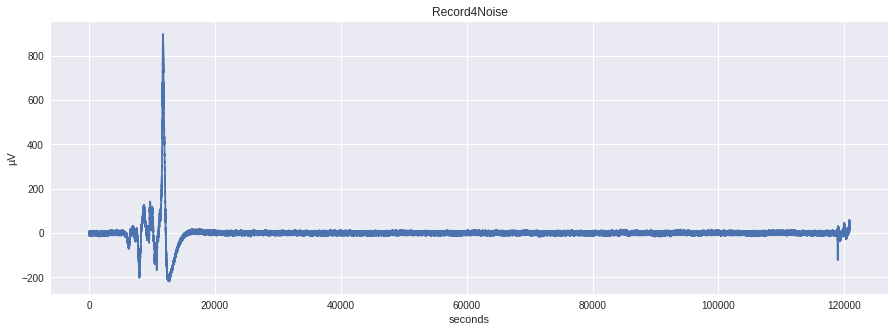

-MEASUREMENT LOCATIONS: MEA placed within faraday cage. MEA is shielded using foil completely enclosing the device. Intan board is left outside of the cage

-GROUNDING: The PCB connecting to the MEA ground wire is connected to the foil and the foil is grounded to the cage door frame

-FARADAY CAGE CONFIGURATION: Cage door is open and table is off

-CONNECTED WELL: Well B 

-BAD CHANNELS: 19,11,20,23

-SOLUTION: 150 micro-liters of Sasai4

-SAMPLING RATE: 30kS/s

-RECODRING TIME: ~5MIN

-HUMAN INTERFERANCE: when leaving and returning heavy amounts of noise occured and therefore the files were removed. The files for this expereiment are only the MEA in an empty room. This is only recording where files were removed. 



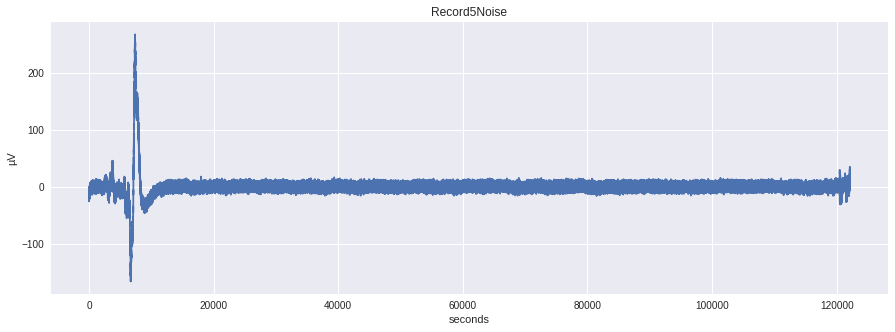

-MEASUREMENT LOCATIONS: MEA placed within faraday cage. MEA is shielded using foil completely enclosing the device. Intan board is left outside of the cage

-GROUNDING: The PCB connecting to the MEA ground wire is connected to the foil and the foil is grounded to the cage door frame

-FARADAY CAGE CONFIGURATION: Cage door is open and table is off

-CONNECTED WELL: Well B 

-BAD CHANNELS: 19,11,20,23

-SOLUTION: 150 micro-liters of Sasai4

-SAMPLING RATE: 30kS/s

-RECODRING TIME: ~5MIN

-HUMAN INTERFERANCE: when leaving and returning heavy amounts of noise occured and therefore the files were removed. The files for this expereiment are only the MEA in an empty room. This is only recording where files were removed. 



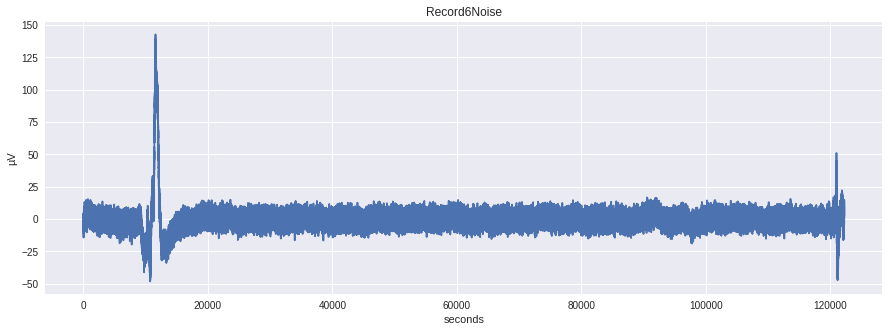

-MEASUREMENT LOCATIONS: MEA placed within faraday cage. MEA is shielded using foil completely enclosing the device. Intan board is left outside of the cage

-GROUNDING: The PCB connecting to the MEA ground wire is connected to the foil and the foil is grounded to the cage door frame

-FARADAY CAGE CONFIGURATION: Cage door is open and table is off

-CONNECTED WELL: Well B 

-BAD CHANNELS: 19,11,20,23

-SOLUTION: 150 micro-liters of Sasai4

-SAMPLING RATE: 30kS/s

-RECODRING TIME: ~5MIN

-HUMAN INTERFERANCE: when leaving and returning heavy amounts of noise occured and therefore the files were removed. The files for this expereiment are only the MEA in an empty room. This is only recording where files were removed. 



In [4]:
# Batch UUID as ingested under derived
batch_uuid = "2019-01-25-v1"

# Load the batch metadata which has a list of all the experiments
batch = requests.get("{}/derived/{}/metadata.json".format(archive_url, batch_uuid)).json()

for k,v in batch.items():
    print("{}: {}".format(k,v))

# Load each experiment and plot the first channel
for experiment in batch["experiments"]:
    X, t, fs, metadata = load_experiment(experiment) 
    
    # Plot
    plt.figure(figsize=(15.0, 5.0))
    plt.plot(t, X[0])
    plt.title(metadata["name"])
    plt.ylabel(metadata["samples"][0]["units"])
    plt.xlabel("seconds")
    plt.show()
    
    print(metadata["notes"])

    # Show any errors - all recordings up to the error will be present
    if "error" in metadata:
        print("WARNING: {}".format(metadata["error"]))